In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

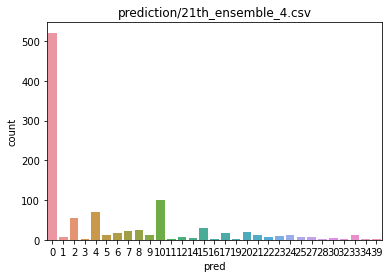

521


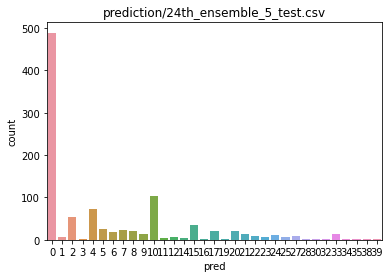

489


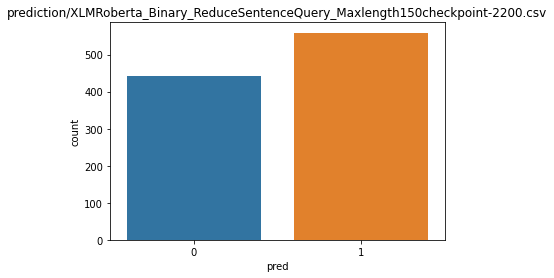

441


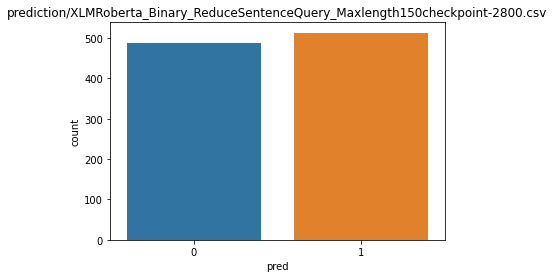

487


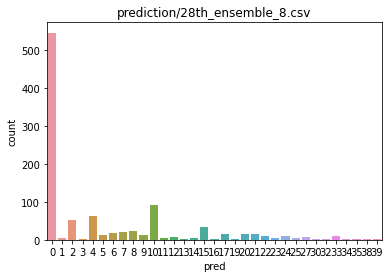

546


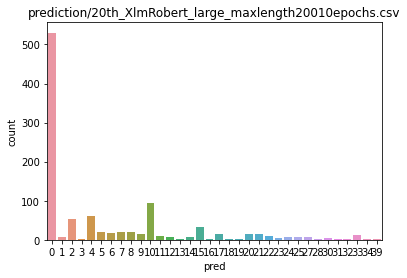

530


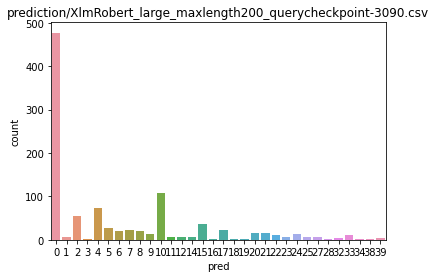

477


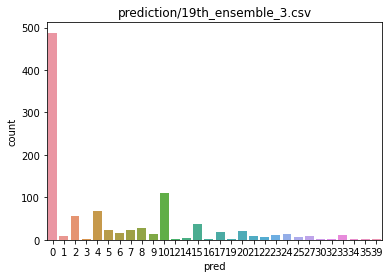

488


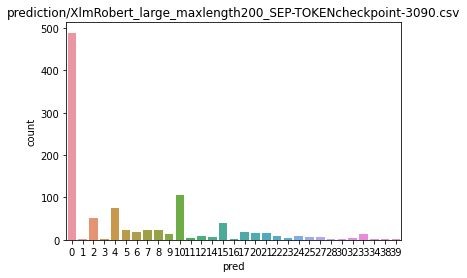

489


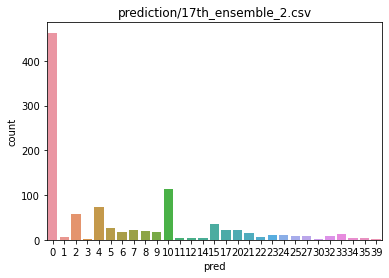

463


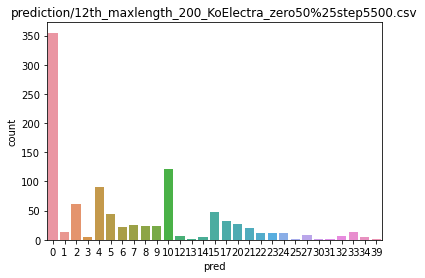

355


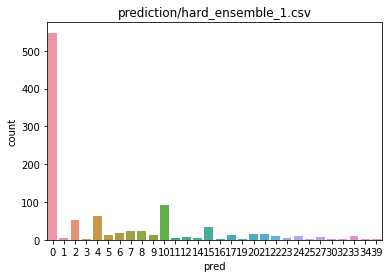

548


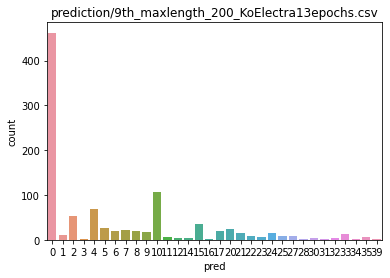

462


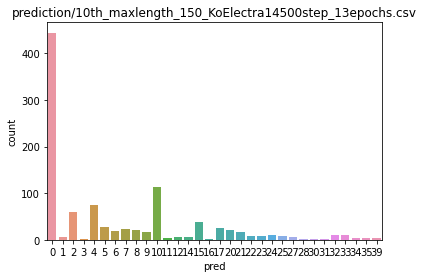

444


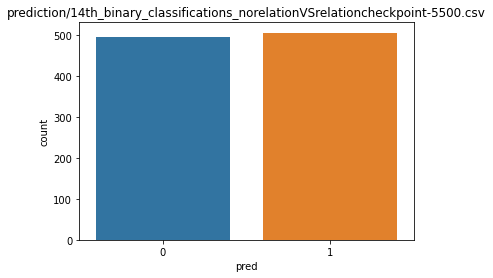

495


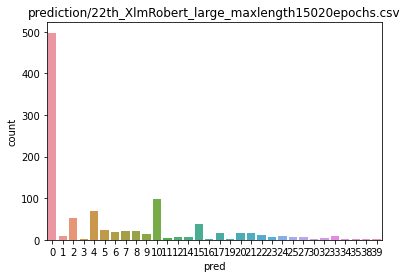

498


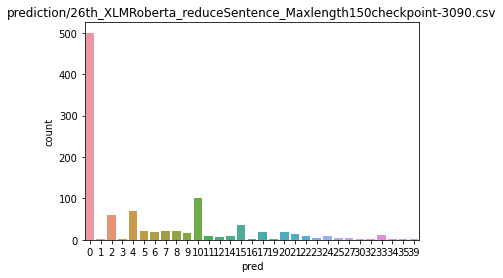

500


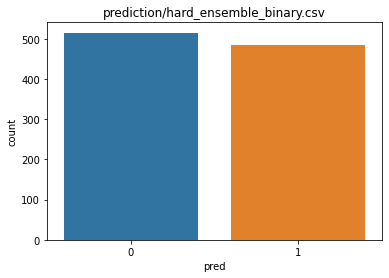

515


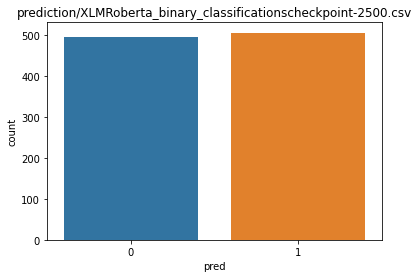

495


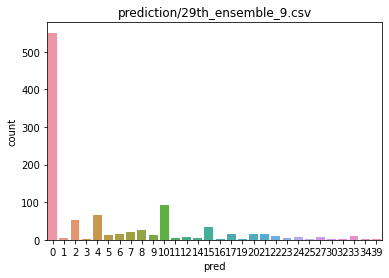

551


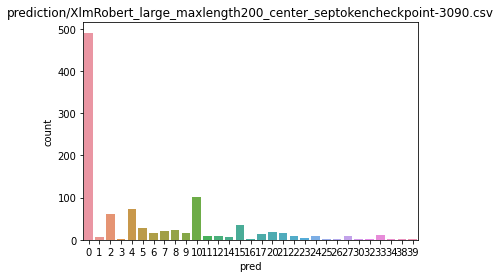

491


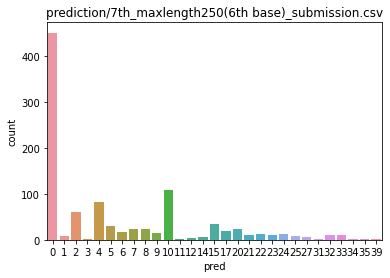

450


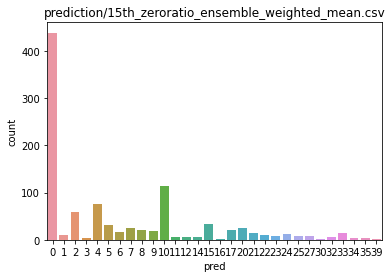

439


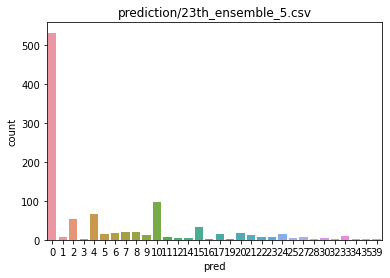

531


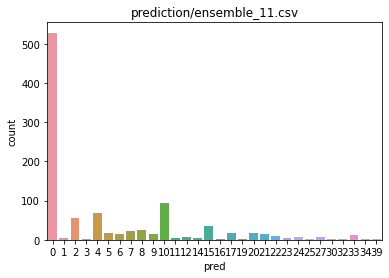

528


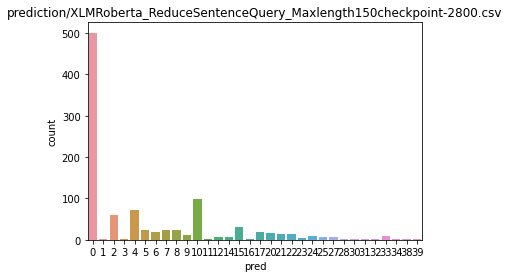

501


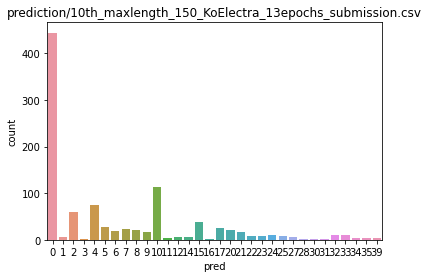

444


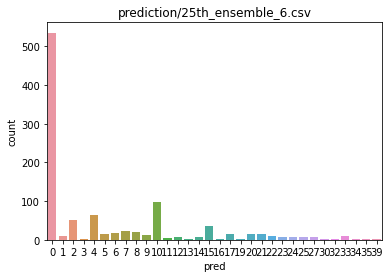

535


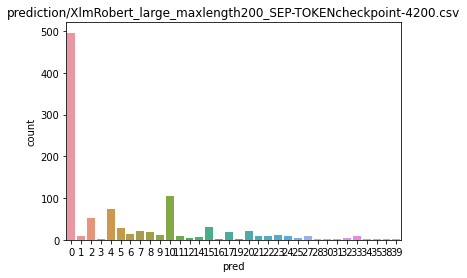

496


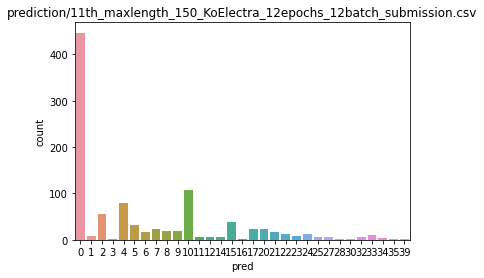

447


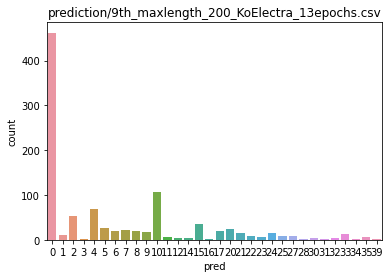

462


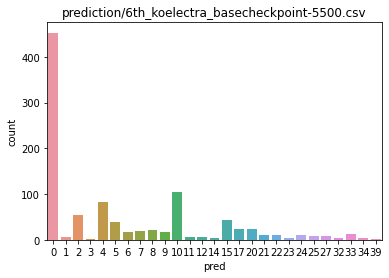

453


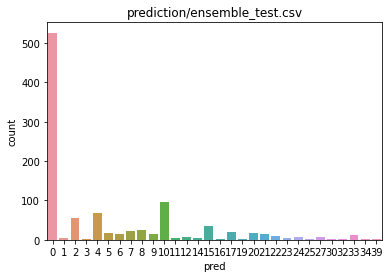

526


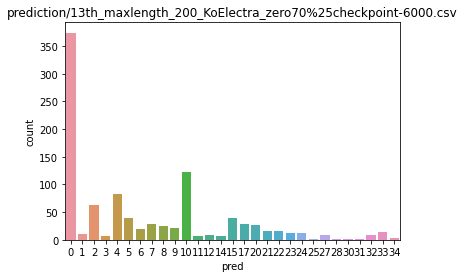

374


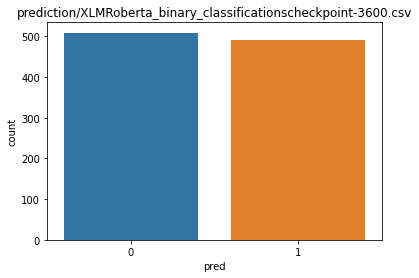

509


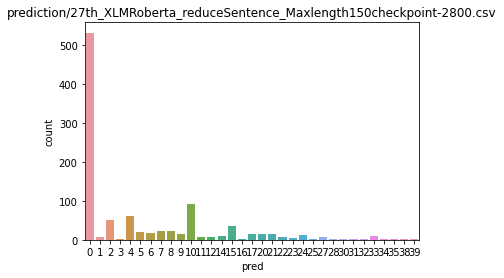

531


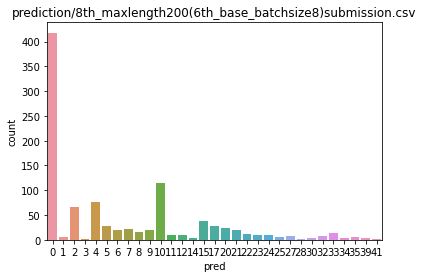

418


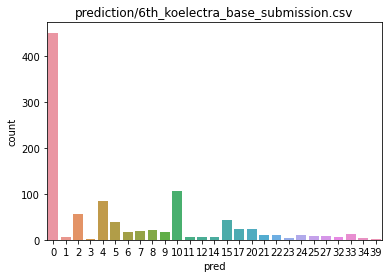

450


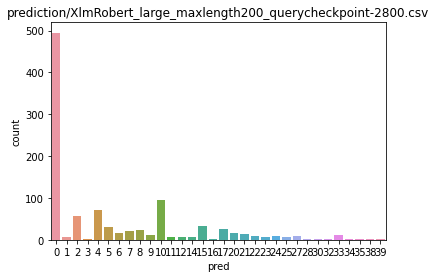

495


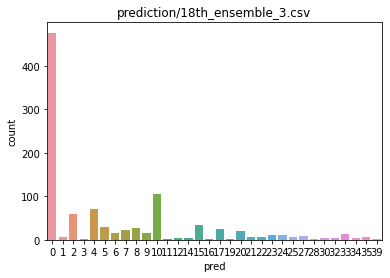

476


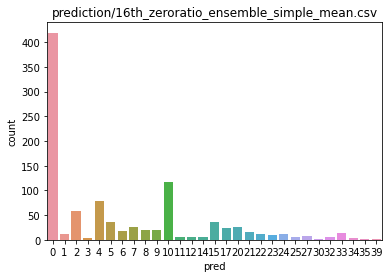

419


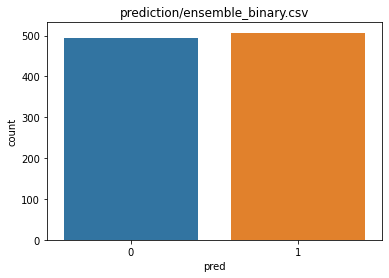

493


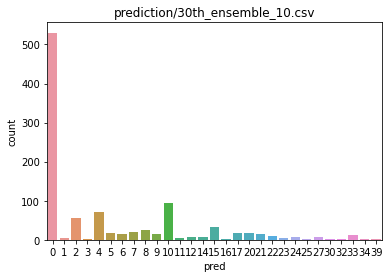

530


In [2]:
file_list = glob.glob("prediction/*.csv")

def countplots(file_list):
    for f in file_list:
        tmp = pd.read_csv(f)
        sns.countplot(tmp.pred)
        plt.title(f)
        plt.show()
        print(tmp.pred.value_counts()[0])
countplots(file_list)

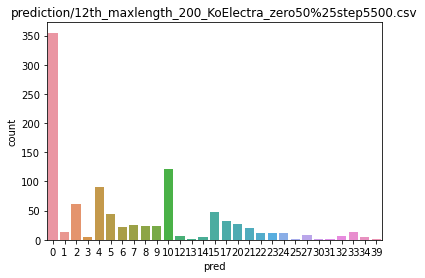

355


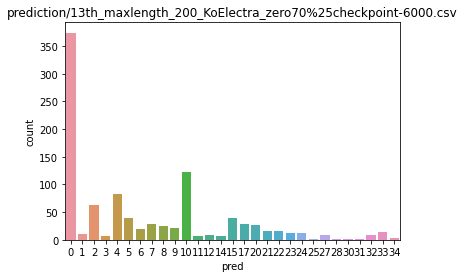

374


In [20]:
file_list = glob.glob("prediction/*%*.csv")
countplots(file_list)

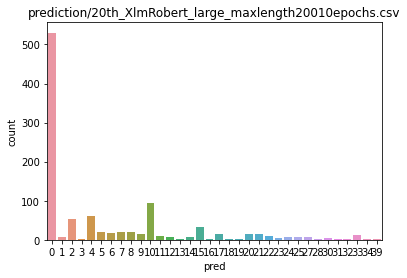

530


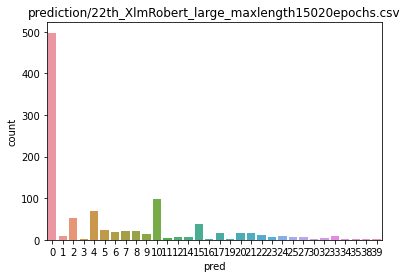

498


In [7]:
file_list = glob.glob("prediction/*Xlm*.csv")
countplotsp(file_list)

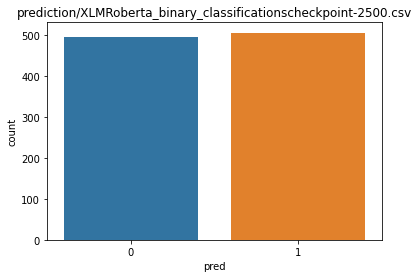

495


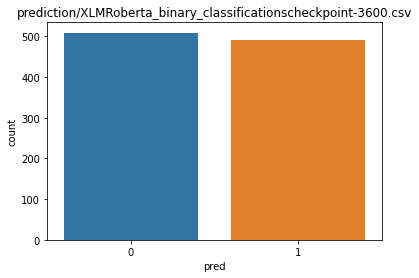

509


In [18]:
file_list = glob.glob("prediction/XLM*.csv")
countplots(file_list)

In [ ]:
## 절반이상이 관계 없음.
# 521개가 관계없음

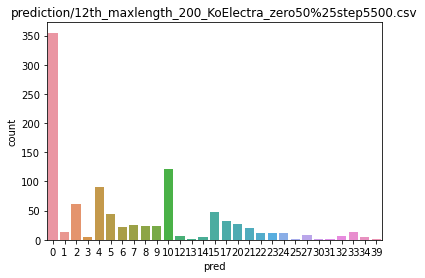

355


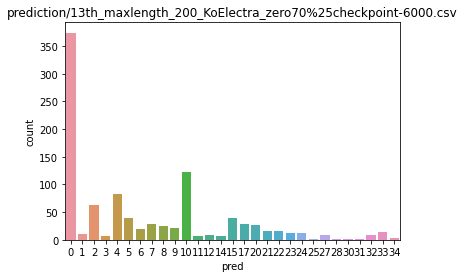

374


In [66]:
file_list = glob.glob("prediction/*%*.csv")
countplots(file_list)

In [4]:
import os

In [5]:
import my_pipelines.DataLoader as DataLoader
dataset = DataLoader.load_data('../input/data/train/train.tsv')
binary = pd.read_csv('./prediction/14th_binary_classifications_norelationVSrelationcheckpoint-5500.csv')

In [7]:
dataset.label.value_counts()

1    4568
0    4432
Name: label, dtype: int64

In [9]:
binary = pd.read_csv('./prediction/14th_binary_classifications_norelationVSrelationcheckpoint-5500.csv')
binary

,pred
0,1
1,1
2,1
3,0
4,0
...,...
995,0
996,1
997,1
998,0


In [3]:
def compare_binary_best(best, binary):
    print(f"best : {best.split('/')[-1]}\nbinary : {binary.split('/')[-1]}\n\n")
    best = pd.read_csv(best)
    binary = pd.read_csv(binary)
    print(f"binary : {len(set(binary.loc[binary.pred == 0 ].index))}")
    print(f"best : {len(set(best.loc[best.pred == 0 ].index))}")
    print(f"intersaction : {len(set(binary.loc[binary.pred == 0 ].index) & set(best.loc[best.pred == 0].index))}")
    print(f"binary - best : {len(set(binary.loc[binary.pred == 0 ].index) - set(best.loc[best.pred == 0].index))}")
    print(f"{set(binary.loc[binary.pred == 0 ].index) - set(best.loc[best.pred == 0].index)}")
    print(f"best - binary : {len(set(best.loc[best.pred == 0].index)-set(binary.loc[binary.pred == 0 ].index))}")
    print(f"{set(best.loc[best.pred == 0].index)-set(binary.loc[binary.pred == 0 ].index)}")
best = "prediction/20th_XlmRobert_large_maxlength20010epochs.csv"
binary = "prediction/XLMRoberta_binary_classificationscheckpoint-3600.csv"
compare_binary_best(best,binary)

best : 20th_XlmRobert_large_maxlength20010epochs.csv
binary : XLMRoberta_binary_classificationscheckpoint-3600.csv


binary : 509
best : 530
intersaction : 454
binary - best : 55
{384, 771, 388, 390, 521, 523, 779, 656, 17, 784, 409, 32, 34, 291, 548, 39, 552, 807, 810, 685, 560, 307, 436, 565, 443, 444, 704, 968, 972, 207, 981, 216, 473, 984, 605, 97, 484, 101, 229, 360, 361, 489, 493, 495, 241, 881, 117, 246, 501, 248, 758, 251, 252, 253, 254}
best - binary : 76
{0, 897, 898, 3, 261, 773, 776, 394, 144, 659, 767, 916, 150, 535, 793, 282, 29, 797, 932, 677, 38, 678, 40, 297, 42, 937, 557, 174, 431, 813, 943, 690, 435, 312, 313, 314, 316, 445, 319, 961, 962, 195, 451, 452, 70, 969, 714, 203, 842, 717, 844, 336, 209, 720, 854, 89, 92, 861, 352, 355, 100, 483, 233, 873, 107, 236, 491, 110, 366, 750, 370, 885, 377, 250, 124, 639}


In [11]:
binary = '/opt/ml/code/prediction/XLMRoberta_binary_classificationscheckpoint-2500.csv'
compare_binary_best(best,binary)

best : 20th_XlmRobert_large_maxlength20010epochs.csv
binary : XLMRoberta_binary_classificationscheckpoint-2500.csv


binary : 495
best : 530
intersaction : 441
binary - best : 54
{388, 5, 390, 772, 264, 779, 656, 657, 658, 409, 923, 540, 291, 548, 560, 436, 565, 692, 184, 697, 315, 443, 63, 704, 456, 329, 968, 207, 853, 981, 344, 216, 473, 730, 984, 478, 737, 867, 484, 101, 229, 742, 489, 493, 495, 881, 756, 117, 246, 501, 248, 251, 252, 254}
best - binary : 89
{0, 7, 11, 42, 557, 59, 67, 586, 92, 611, 100, 107, 110, 113, 626, 119, 124, 639, 641, 659, 669, 161, 165, 677, 681, 174, 690, 714, 720, 214, 235, 236, 750, 244, 757, 761, 250, 769, 770, 261, 773, 279, 282, 797, 809, 813, 305, 311, 312, 313, 314, 316, 319, 837, 842, 331, 844, 336, 342, 854, 860, 862, 355, 870, 366, 880, 885, 377, 893, 897, 394, 395, 420, 421, 937, 431, 432, 943, 435, 445, 961, 451, 452, 454, 969, 472, 480, 491, 502}


In [16]:
best = './prediction/25th_ensemble_6.csv'
binary = './prediction/20th_XlmRobert_large_maxlength20010epochs.csv'
compare_binary_best(best, binary)

best : 25th_ensemble_6.csv
binary : 20th_XlmRobert_large_maxlength20010epochs.csv


binary : 530
best : 535
intersaction : 503
binary - best : 27
{897, 773, 529, 659, 161, 165, 681, 937, 813, 431, 690, 445, 72, 969, 714, 720, 214, 92, 100, 107, 366, 750, 880, 626, 502, 124, 639}
best - binary : 32
{264, 523, 779, 656, 661, 923, 290, 436, 565, 821, 444, 703, 704, 207, 722, 339, 853, 981, 216, 473, 984, 605, 733, 97, 101, 742, 489, 241, 881, 117, 248, 251}


In [14]:
best = './prediction/25th_ensemble_6.csv'
binary = './prediction/XlmRobert_large_maxlength200_SEP-TOKENcheckpoint-4200.csv'
compare_binary_best(best, binary)

best : 25th_ensemble_6.csv
binary : XlmRobert_large_maxlength200_SEP-TOKENcheckpoint-4200.csv


binary : 496
best : 535
intersaction : 461
binary - best : 35
{384, 514, 5, 270, 659, 540, 161, 291, 165, 806, 167, 552, 425, 681, 43, 810, 690, 184, 825, 186, 443, 64, 450, 579, 334, 600, 92, 485, 618, 107, 495, 880, 501, 765, 254}
best - binary : 74
{0, 898, 132, 261, 7, 264, 391, 656, 402, 275, 916, 150, 279, 282, 794, 923, 669, 797, 290, 932, 677, 166, 40, 809, 172, 174, 433, 436, 821, 312, 313, 314, 59, 316, 568, 696, 703, 451, 452, 454, 586, 203, 844, 209, 722, 978, 854, 215, 216, 473, 727, 855, 605, 733, 861, 352, 97, 480, 357, 631, 873, 363, 491, 620, 367, 241, 881, 882, 117, 503, 248, 249, 893, 638}


In [95]:
best = './prediction/28th_ensemble_8.csv'
binary = './prediction/ensemble_test.csv'
compare_binary_best(best,binary)

best : 28th_ensemble_8.csv
binary : ensemble_test.csv


binary : 532
best : 546
intersaction : 519
binary - best : 13
{897, 579, 388, 552, 45, 592, 17, 658, 307, 855, 313, 378, 829}
best - binary : 27
{261, 517, 264, 394, 779, 656, 276, 290, 932, 678, 555, 174, 819, 312, 697, 59, 703, 704, 331, 209, 722, 339, 733, 97, 229, 113, 503}


In [90]:
best = './prediction/28th_ensemble_8.csv'
binary = './prediction/ensemble_test.csv'
compare_binary_best(best,binary)

best : 28th_ensemble_8.csv
binary : ensemble_test.csv


binary : 532
best : 546
intersaction : 519
binary - best : 13
{897, 579, 388, 552, 45, 592, 17, 658, 307, 855, 313, 378, 829}
best - binary : 27
{261, 517, 264, 394, 779, 656, 276, 290, 932, 678, 555, 174, 819, 312, 697, 59, 703, 704, 331, 209, 722, 339, 733, 97, 229, 113, 503}


In [110]:
best = './prediction/29th_ensemble_9.csv'
b= './prediction/28th_ensemble_8.csv'
# b = '/opt/ml/code/prediction/XLMRoberta_Binary_ReduceSentenceQuery_Maxlength150checkpoint-2800.csv'

compare_binary_best(best,b)

best : 29th_ensemble_9.csv
binary : 28th_ensemble_8.csv


binary : 546
best : 551
intersaction : 529
binary - best : 17
{290, 932, 261, 678, 264, 394, 331, 174, 656, 209, 722, 339, 819, 312, 697, 733, 703}
best - binary : 22
{897, 388, 17, 658, 409, 291, 807, 552, 810, 45, 560, 307, 313, 829, 579, 968, 592, 855, 501, 758, 378, 254}


In [109]:
best = './prediction/29th_ensemble_9.csv'
b = './prediction/ensemble_test.csv'

compare_binary_best(best,b)

best : 29th_ensemble_9.csv
binary : ensemble_test.csv


binary : 526
best : 551
intersaction : 526
binary - best : 0
set()
best - binary : 25
{517, 779, 276, 409, 291, 807, 810, 555, 560, 436, 59, 704, 968, 727, 216, 859, 97, 101, 229, 113, 501, 758, 503, 252, 254}


<br></br>
<br></br>

### 중복 plot 을 통해서 비교하기

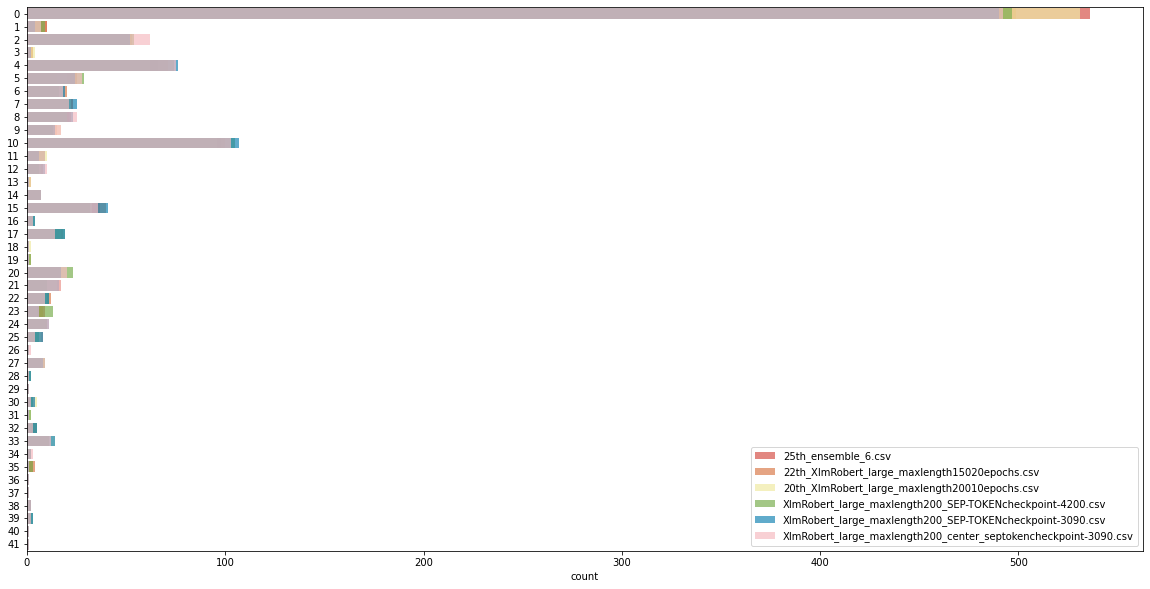

In [38]:
import matplotlib.pyplot as plt
colors = ['#ee4035','#f37736','#fdf498','#7bc043','#0392cf',
          "#ffb3ba","#ffdfba","#ffffba","#baffc9","#bae1ff","#666547","#fb2e01","#6fcb9f","#ffe28a","#fffeb3"]
def draw_countplot(target_files, alpha=1):
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize = (20,10))
    tmp_df = pd.DataFrame({'pred':list(range(42))*2})
    for i,f in enumerate(target_files):
        data = list(pd.read_csv(f).values.flatten())
        sns.countplot( y=data+list(range(42)), color = colors[i], alpha=alpha, ax=ax) 
    plt.legend([f.split('/')[-1] for f in target_files])
    plt.show()
    
target_files = [
    "/opt/ml/code/prediction/25th_ensemble_6.csv",
    "/opt/ml/code/prediction/22th_XlmRobert_large_maxlength15020epochs.csv",
    "/opt/ml/code/prediction/20th_XlmRobert_large_maxlength20010epochs.csv",
    "/opt/ml/code/prediction/XlmRobert_large_maxlength200_SEP-TOKENcheckpoint-4200.csv",
    "/opt/ml/code/prediction/XlmRobert_large_maxlength200_SEP-TOKENcheckpoint-3090.csv",
    "/opt/ml/code/prediction/XlmRobert_large_maxlength200_center_septokencheckpoint-3090.csv"
]
draw_countplot(target_files, 0.7)

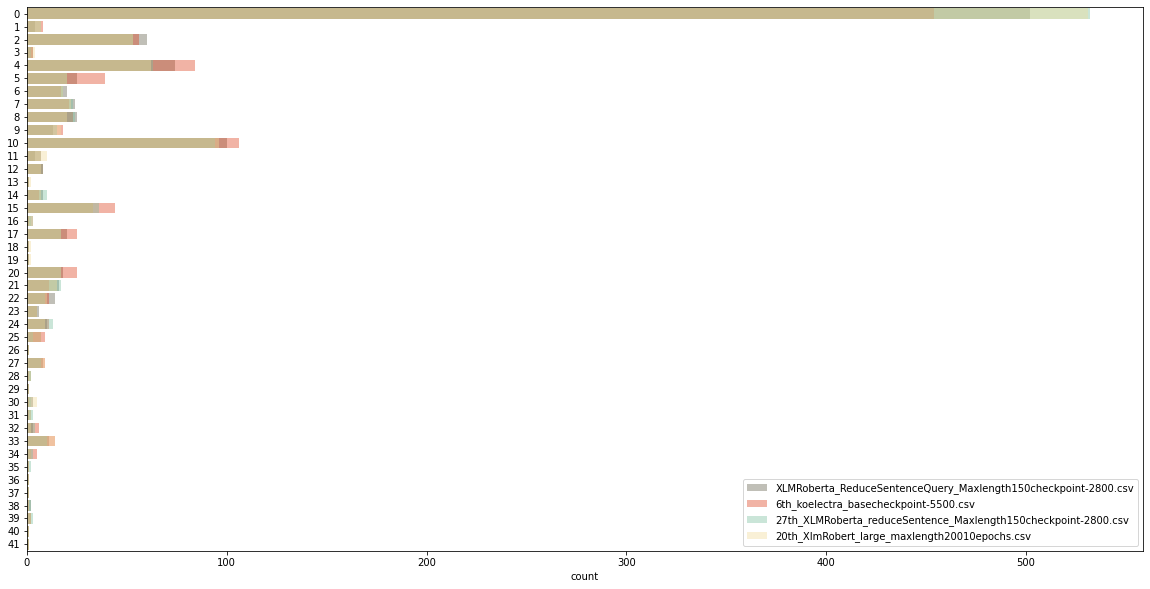

In [39]:
colors = ["#666547","#fb2e01","#6fcb9f","#ffe28a","#fffeb3"]
target_files = [
'prediction/XLMRoberta_ReduceSentenceQuery_Maxlength150checkpoint-2800.csv', 
'prediction/6th_koelectra_basecheckpoint-5500.csv', 
'prediction/27th_XLMRoberta_reduceSentence_Maxlength150checkpoint-2800.csv', 
'prediction/20th_XlmRobert_large_maxlength20010epochs.csv'
]
draw_countplot(target_files, 0.4)

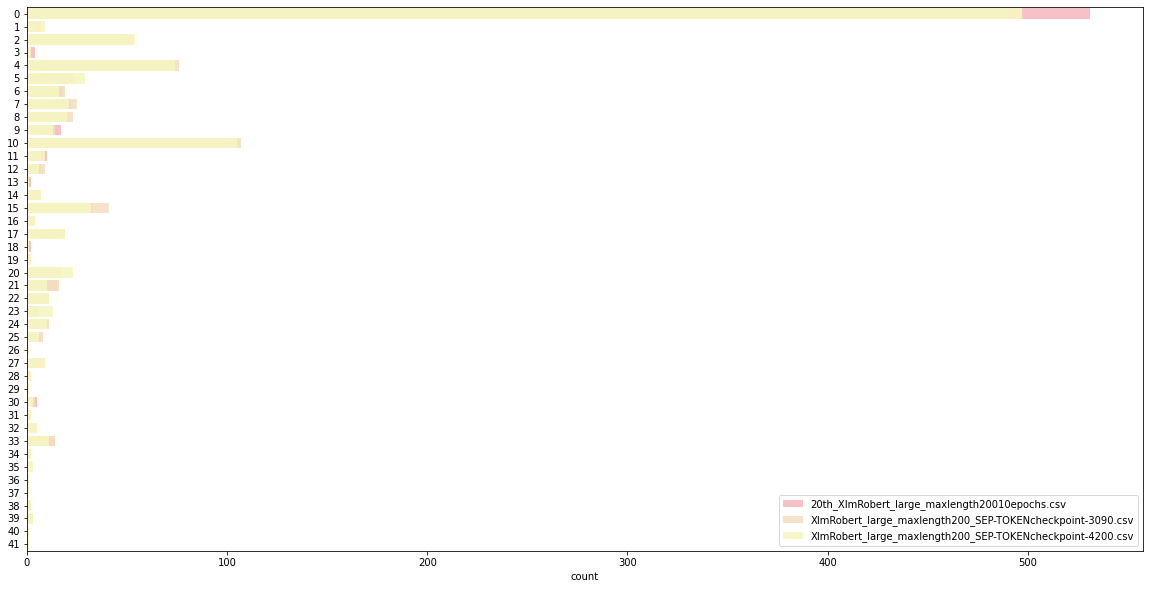

In [46]:
fs =["/opt/ml/code/prediction/20th_XlmRobert_large_maxlength20010epochs.csv",
    "/opt/ml/code/prediction/XlmRobert_large_maxlength200_SEP-TOKENcheckpoint-3090.csv",
    "/opt/ml/code/prediction/XlmRobert_large_maxlength200_SEP-TOKENcheckpoint-4200.csv"]
draw_countplot(fs,0.9)

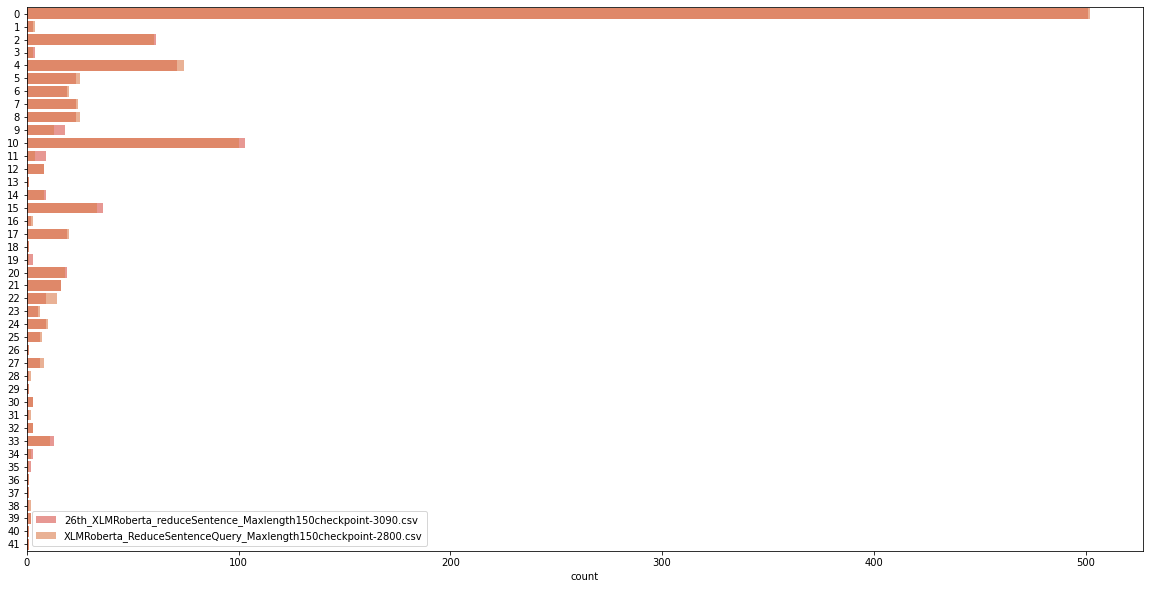

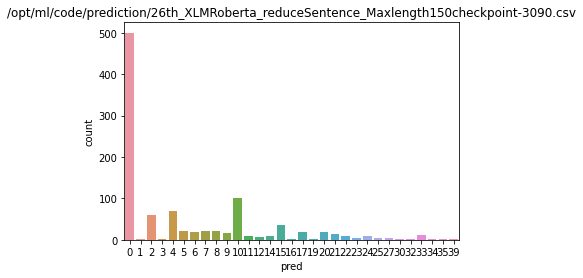

500


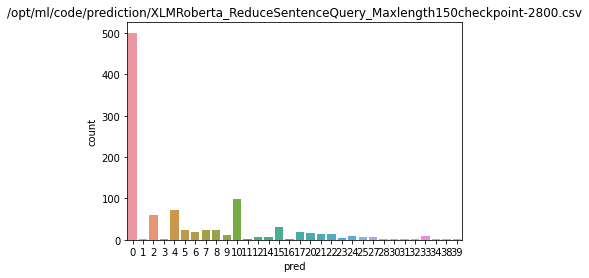

501


In [69]:
fs =[
#     "/opt/ml/code/prediction/27th_XLMRoberta_reduceSentence_Maxlength150checkpoint-2800.csv",
    "/opt/ml/code/prediction/26th_XLMRoberta_reduceSentence_Maxlength150checkpoint-3090.csv",
    "/opt/ml/code/prediction/XLMRoberta_ReduceSentenceQuery_Maxlength150checkpoint-2800.csv"
    ]
draw_countplot(fs,0.6)
countplots(fs)

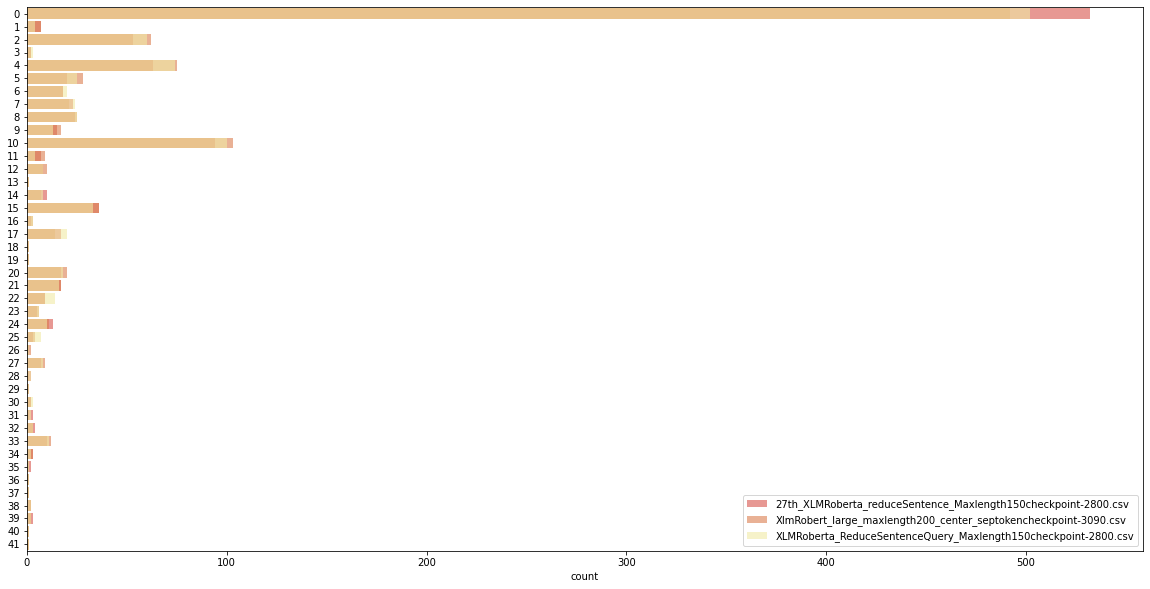

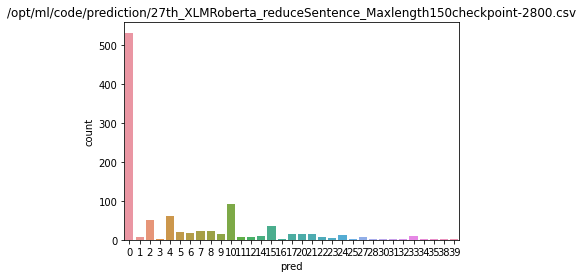

531


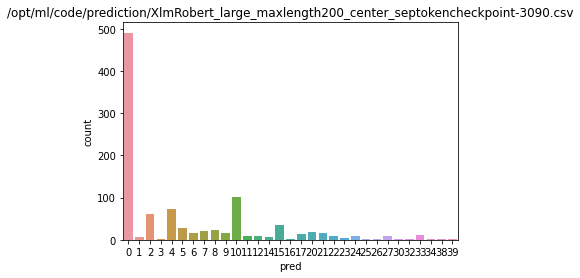

491


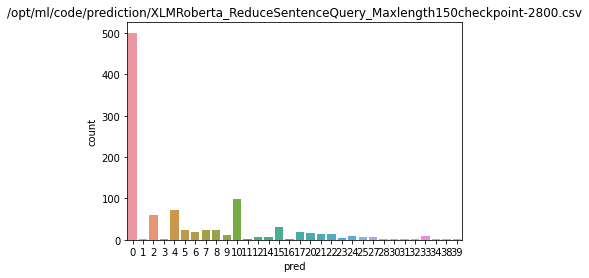

501


In [78]:
fs =[
    "/opt/ml/code/prediction/27th_XLMRoberta_reduceSentence_Maxlength150checkpoint-2800.csv",
#     "/opt/ml/code/prediction/XlmRobert_large_maxlength200_querycheckpoint-2800.csv",
#     "/opt/ml/code/prediction/XlmRobert_large_maxlength200_querycheckpoint-3090.csv",
    "/opt/ml/code/prediction/XlmRobert_large_maxlength200_center_septokencheckpoint-3090.csv",
    "/opt/ml/code/prediction/XLMRoberta_ReduceSentenceQuery_Maxlength150checkpoint-2800.csv"
    ]
draw_countplot(fs,0.6)
countplots(fs)

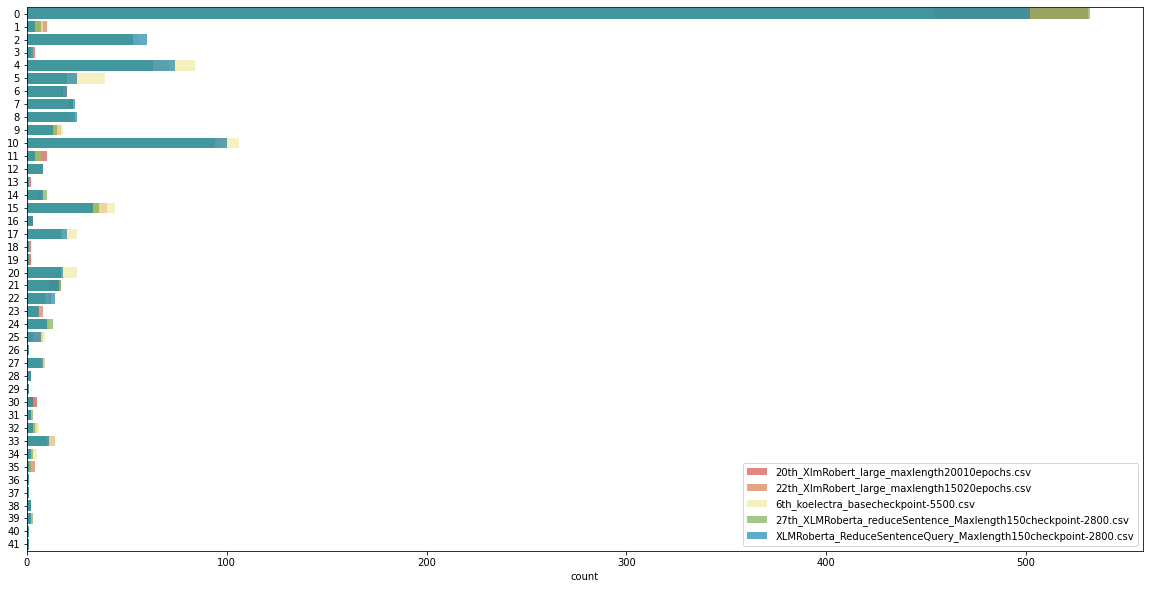

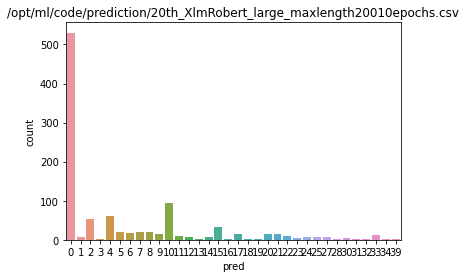

530


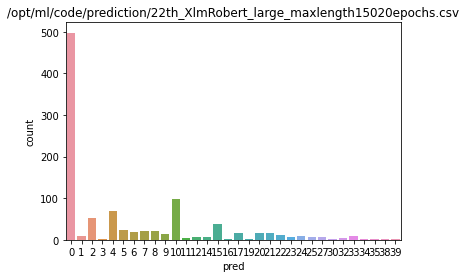

498


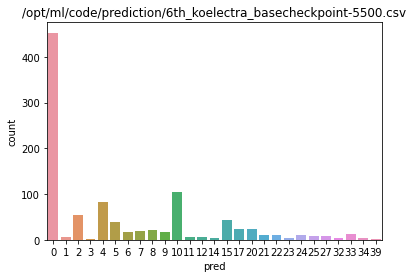

453


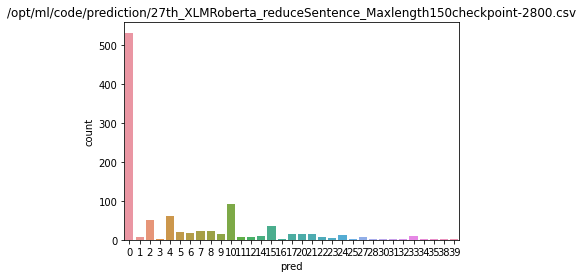

531


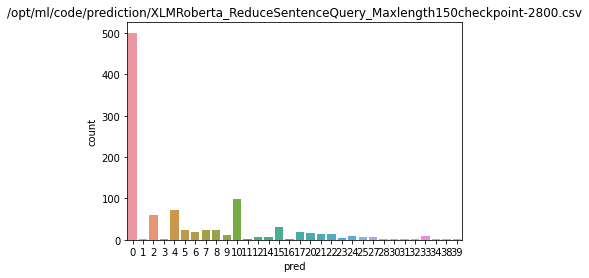

501


In [81]:
f = [
    "/opt/ml/code/prediction/20th_XlmRobert_large_maxlength20010epochs.csv",
    "/opt/ml/code/prediction/22th_XlmRobert_large_maxlength15020epochs.csv",
    "/opt/ml/code/prediction/6th_koelectra_basecheckpoint-5500.csv",
    "/opt/ml/code/prediction/27th_XLMRoberta_reduceSentence_Maxlength150checkpoint-2800.csv",
    "/opt/ml/code/prediction/XLMRoberta_ReduceSentenceQuery_Maxlength150checkpoint-2800.csv"
    
]
draw_countplot(f, 0.7)
countplots(f)

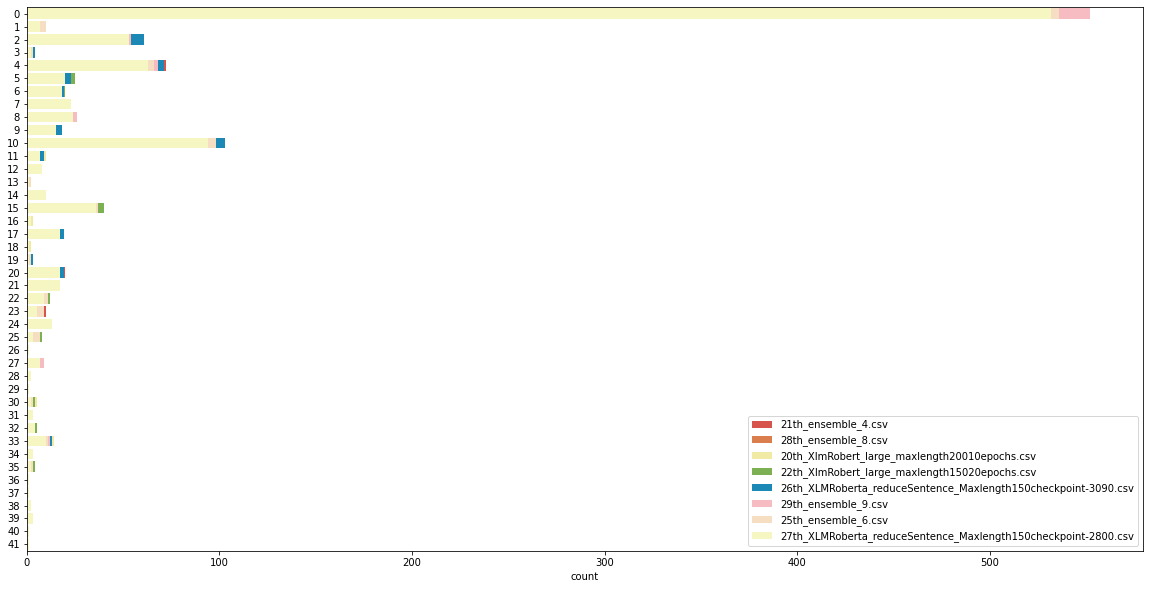

In [111]:
fs = glob.glob("/opt/ml/code/prediction/hard_voting/*.csv")
draw_countplot(fs)

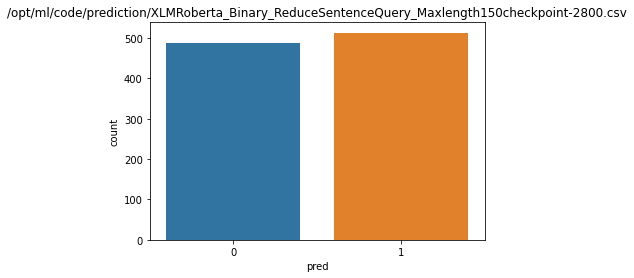

487


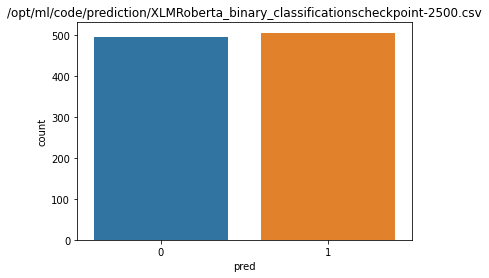

495


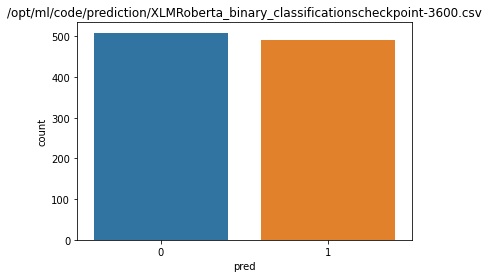

509


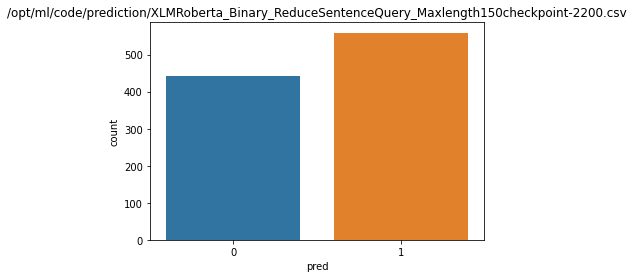

441


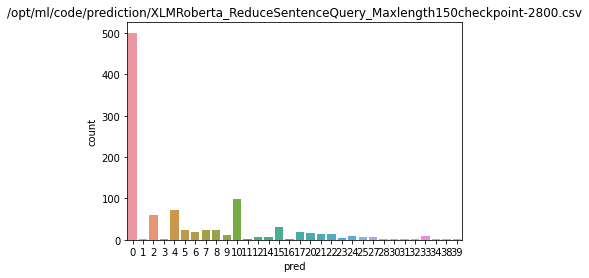

501


In [103]:
f = ["/opt/ml/code/prediction/XLMRoberta_Binary_ReduceSentenceQuery_Maxlength150checkpoint-2800.csv",
    "/opt/ml/code/prediction/XLMRoberta_binary_classificationscheckpoint-2500.csv",
    "/opt/ml/code/prediction/XLMRoberta_binary_classificationscheckpoint-3600.csv",
    '/opt/ml/code/prediction/XLMRoberta_Binary_ReduceSentenceQuery_Maxlength150checkpoint-2200.csv',
#     "/opt/ml/code/prediction/XLMRoberta_ReduceSentenceQuery_Maxlength150checkpoint-2800.csv"]
countplots(f)

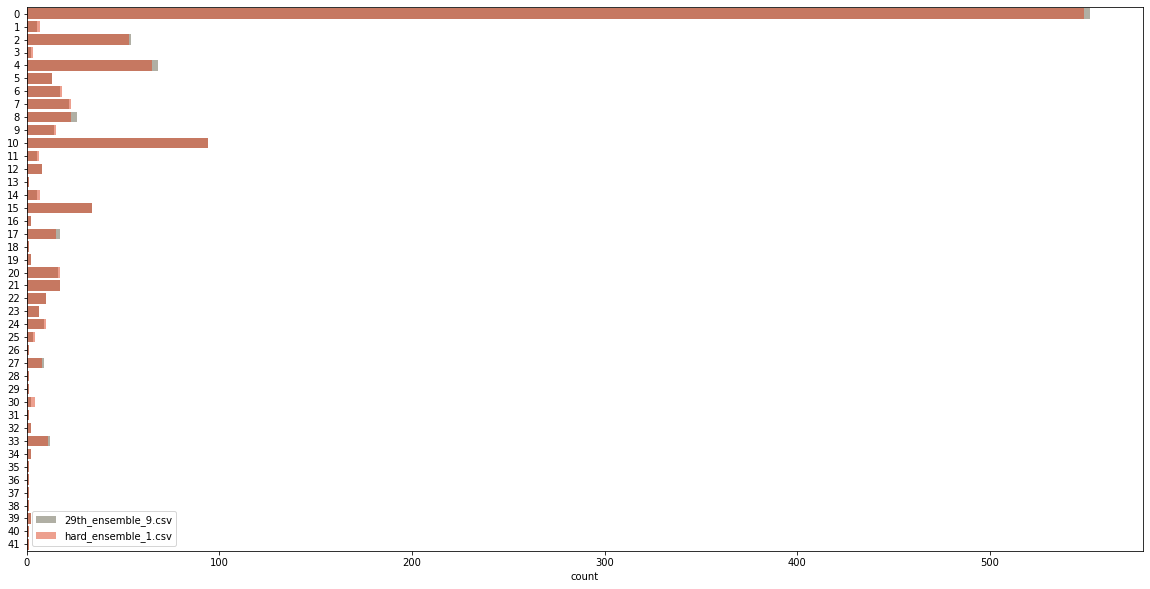

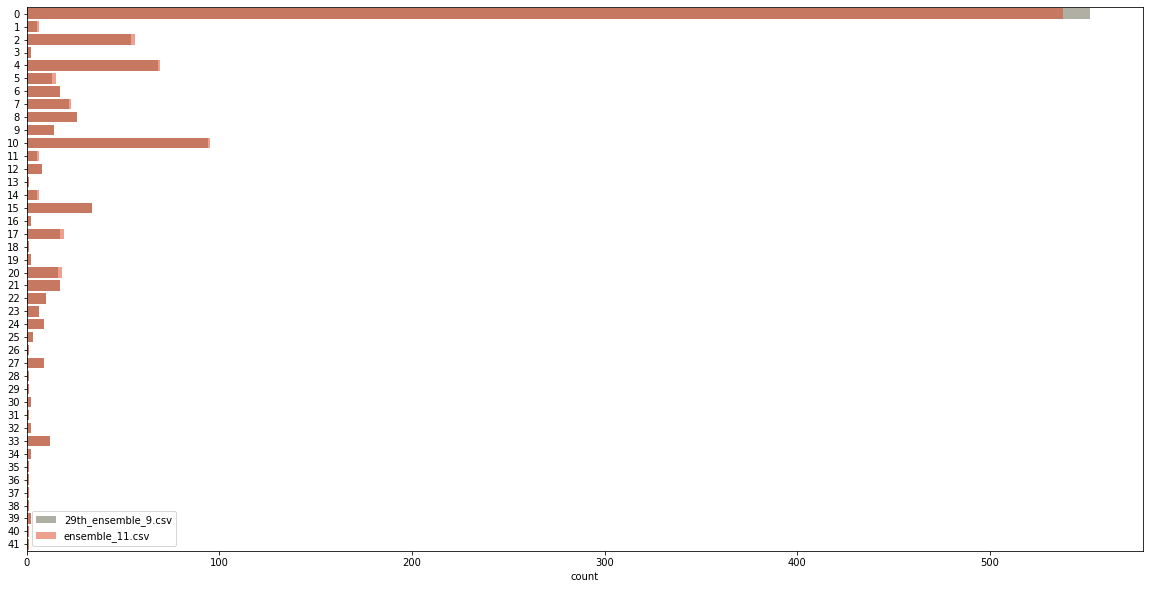

In [17]:
colors = ["#666547","#fb2e01","#6fcb9f","#ffe28a","#fffeb3"]

f = [
    "./prediction/29th_ensemble_9.csv",
    "./prediction/hard_ensemble_1.csv"
]
draw_countplot(f,0.5)
f = [
    "./prediction/29th_ensemble_9.csv",
    "./prediction/ensemble_11.csv"
]
draw_countplot(f,0.5)